# Project 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.fftpack import fft,ifft

## Problem 1

$E[X[n]] = \sum\limits_{i =0}^nE[U[i]] = (n+1)E[U] = (n+1)\times(-\frac{1}{4}+\frac{3}{4}) = \frac{n+1}{2}$<br/>
$Var[X[n]] = \sum\limits_{i =0}^nVar[U[i]] = (n+1)Var[U] = (n+1)\times(1 - \frac{1}{4}) = \frac{3(n+1)}{4}$

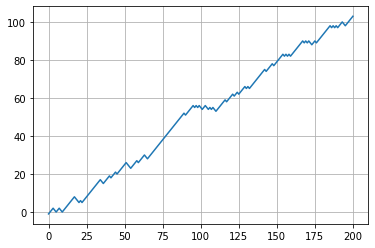

In [26]:
n = 200
p = 0.75
U = np.random.binomial(1,p,n+1)
U[U == 0] = -1
X = np.cumsum(U)
plt.plot(X)
plt.grid()
plt.show()

<font size = 3> as $n$ goes to infinity, $X[n]$ goes to infinity. Because $P_U[k = 1] > P_U[k = -1]$ </font>

<font size = 3> if $P_U[k] = \begin{cases} 
\frac{1}{2} & k=1\\ 
\frac{1}{2}&k=-1 
\end{cases} $ </font>

$E[X[n]] = 0$<br/>
$Var[X[n]] = n+1$

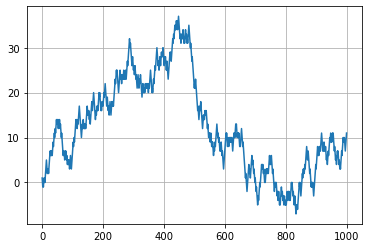

In [31]:
n = 1000
p = 0.5
U = np.random.binomial(1,p,n+1)
U[U == 0] = -1
X = np.cumsum(U)
plt.plot(X)
plt.grid()
plt.show()

<font size = 3> as $n$ goes to infinity, $X[n]$ hovers up and down at zero point.<br/>
Because $P_U[k = 1] = P_U[k = -1]$, $E[X[n]] = 0$ and $Var[X[n]]$ increases with n</font>

<font size = 3> if $P_U[k] = \begin{cases} 
\frac{49}{100} & k=1\\ 
\frac{51}{100}&k=-1 
\end{cases} $ </font>

$E[X[n]] = -\frac{n+1}{50}$<br/>
$Var[X[n]] =\frac{2499(n+1)}{2500}$

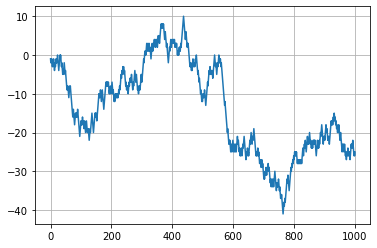

In [34]:
n = 1000
p = 0.49
U = np.random.binomial(1,p,n+1)
U[U == 0] = -1
X = np.cumsum(U)
plt.plot(X)
plt.grid()
plt.show()

<font size = 3> as $n$ goes to infinity, $X[n]$ goes to negative infinity. Because $P_U[k = 1] < P_U[k = -1]$ </font>

## Problem 2

<font size =5>$r_x[0] = \frac{\sigma^2_U}{1-a^2} = 10.256410256410254$</font>

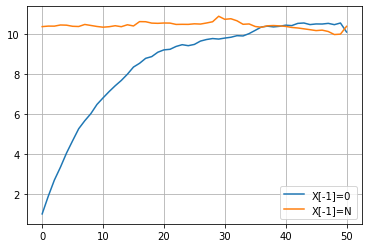

In [81]:
VarU = 1
a = 0.95
M = 10000
X1 = np.zeros([M,51])
X2 = np.zeros([M,51])
X2[:,0] = np.random.normal(loc = 0, scale = np.sqrt(VarU/(1-a*a)), size = M )
for i in range(1,51):
    U = np.random.normal(loc = 0, scale = np.sqrt(VarU), size = M ) 
    X1[:,i] = a * X1[:,i-1] + U
    U = np.random.normal(loc = 0, scale = np.sqrt(VarU), size = M ) 
    X2[:,i] = a * X2[:,i-1] + U
rx0_1 = np.array([])
rx0_2 = np.array([])
for i in range(50):
    rx0_1 = np.append(rx1,np.power(X1[:,i+1],2).mean())
    rx0_2 = np.append(rx2,np.power(X2[:,i+1],2).mean())
plt.grid()
plt.plot(rx0_1,label="X[-1]=0")
plt.plot(rx0_2,label="X[-1]=N")
plt.legend()
plt.show()

<font size = 3>
For the first realization, which $X[-1] = 0$, as $n$ increases, the $rx[0]$ based on $X^2[n]$ converges to theoretical result<br/>
For the second realization, which $X[-1] = N(0,\sigma^2_U/(1-a^2))$ the $rx[0]$ always converges to theoretical result
</font>

In [82]:
print("First realization: %f"%rx0_1[-1])

First realization: 10.124277


In [83]:
print("Second realization: %f"%rx0_2[-1])

Second realization: 10.405883


## Problem 3

<font size =5>
For this ARMA Process: $H(\Omega) = \frac{1-be^{-j\Omega}}{1-ae^{-j\Omega}}$ <br/>
$|H(\Omega)|^2 = \frac{1+b^2-2bcos\Omega}{1+a^2 -2acos\Omega}$


</font>

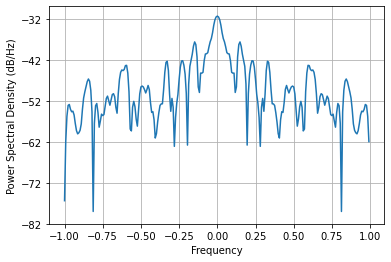

In [28]:
a = 0.9
b = 0.2
N = 100
VarU = 1
trials = 10000
U = np.random.normal(0, np.sqrt(VarU), size = (trials,N + 1))
X = np.zeros(shape = (trials,N + 1))
X[:,0] = np.random.normal(0, np.sqrt(VarU *  (1 + (a - b)* (a - b)/(1 - a * a))), size = trials)
for i in range(1,N + 1):
    X[:,i] = a*X[:,i - 1] + U[:,i] - b*U[:,i - 1]
X_mean = np.zeros(N)
for i in range(1,N + 1):
    X_mean[i - 1] = X[:,i].mean()
(pxx,freq) = plt.psd(X_mean,sides = 'twosided')
plt.show()

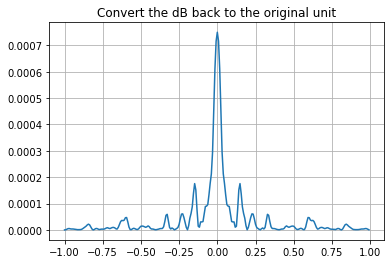

In [29]:
plt.grid()
plt.title("Convert the dB back to the original unit")
plt.plot(freq,pxx)
plt.show()

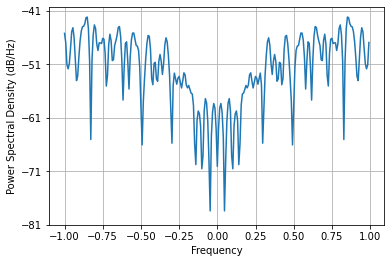

In [44]:
a = 0.2
b = 0.9
N = 100
VarU = 1
trials = 10000
U = np.random.normal(0, np.sqrt(VarU), size = (trials,N + 1))
X = np.zeros(shape = (trials,N + 1))
X[:,0] = np.random.normal(0, np.sqrt(VarU * (1 + (a - b)* (a - b)/(1 - a * a))), size = trials)
for i in range(1,N + 1):
    X[:,i] = a*X[:,i - 1] + U[:,i] - b*U[:,i - 1]
X_mean = np.zeros(N)
for i in range(1,N + 1):
    X_mean[i - 1] = X[:,i].mean()
(pxx,freq) = plt.psd(X_mean,sides = 'twosided')
plt.show()

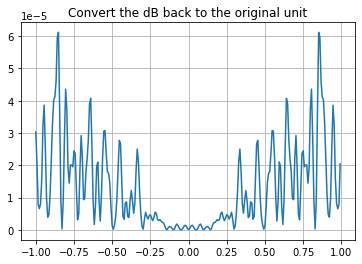

In [45]:
plt.grid()
plt.title("Convert the dB back to the original unit")
plt.plot(freq,pxx)
plt.show()

<font size =3>
The simulated PSD is similar to the transfer function
$|H(\Omega)|^2 = \frac{1+b^2-2bcos\Omega}{1+a^2 -2acos\Omega}$
</font>

## Problem 4

<font size = 5>$ H_{opt}(f) = \frac{P_S(f)}{P_S(f)+P_W(f)}$ </font>

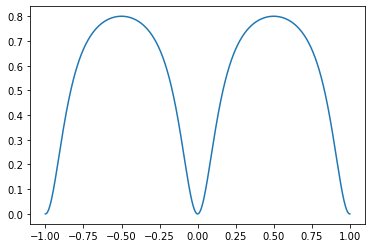

In [7]:
M = 2000
VarW = 1
X = np.linspace(-1,1,M)
Y=(1 - 1/(1+2-2*np.cos(2*np.pi*X)))
plt.plot(X,Y)
plt.show()

<font size = 5>$ mse_{min} = \int^{\frac{1}{2}}_{-\frac{1}{2}} \frac{P_S(f)P_W(f)}{P_S(f)+P_W(f)} df$ </font>

In [8]:
# use sum to estimate
Y.mean()

0.5525100112977921

In [16]:
# use integral to estimate
def f(x):
    return (1 - 1/(1+2-2*np.cos(2*np.pi*x)))
mse = integrate.quad(f, -0.5, 0.5)
mse[0]

0.5527864045000449

## Problem 5

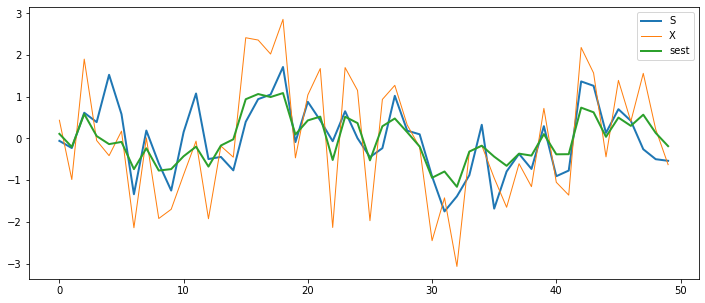

In [123]:
a = 0.25
varU = 0.5
varW = 1
N = 50
S = np.zeros(N + 1)
S[0] = np.random.normal(0,np.sqrt(varU/(1-a*a)))
for i in range (1, N + 1):
    S[i] = a * S[i - 1] + np.random.normal(0,np.sqrt(varU))
W = np.random.normal(0,np.sqrt(VarW),N)
X = W + S[1:]
# code in the book
Nfft=1024
x = np.linspace(0,1,Nfft)
Ps = varU / (1 + a * a - 2 * a * np.cos(2 * np.pi * x))
Hf= Ps / (Ps+varW) 
sestf = Hf * fft(X,Nfft)
sest = ifft(sestf,Nfft).real
plt.figure(figsize=(12,5))
plt.plot(S[1:], label = "S",linewidth = 2)
plt.plot(X, label = "X",linewidth = 1)
plt.plot(sest[:50], label="sest",linewidth = 2)
plt.legend()
plt.show()

## Problem 6

<font size = 3>
    For the MA process: $X[n] = \beta_0U[n] + \beta_1U[n-1]$,
    we have $H(\Omega) = \beta_0 + \beta_1e^{-j\Omega}$ <br>
    $|H(\Omega)|^2 = \beta_0^2 + \beta_1^2 + 2\beta_0\beta_1cos(\Omega) = 2 - 2cos(\Omega) \Rightarrow \beta_0 = \pm1,\beta_1 = \mp1 $ <br>
    Therefore, we can set $X[n] = U[n] - U[n-1]$ <br>
    $h[k] = \begin{cases} 
1 & k=0\\ 
-1 & k=1 \\
0 & others
\end{cases}$
    
</font>

In [265]:
N = 100000
K = 10
varU = 1
U = np.random.normal(0,np.sqrt(varU), N + 1)
X = U[1:] - U[:-1]
# X

<font size = 3>
    Because we have :$ rx[k] =\sigma_U^2 \sum\limits_{m = -\infty}^{\infty}h[m]h[m+k]$ <br>
    in this problem:<br>
    $rx[k] = \begin{cases} 
    2 & k=0\\ 
    -1 & k=1 \\
    0 & others
    \end{cases}$
    </font>

In [280]:
Rx = np.zeros(K)
Rx[0] = (X * X).mean()
for k in range(1,K):
    Rx[k] = (X[k:] * X[:-k]).mean()
r = pd.DataFrame(Rx,columns=["estimation"])
r["theory"] = np.array([2,-1,0,0,0,0,0,0,0,0])
r

,estimation,theory
0,1.990350,2
1,-0.995648,-1
2,0.001963,0
3,-0.003115,0
4,-0.000220,0
5,0.004426,0
6,0.002598,0
7,-0.012819,0
8,0.015140,0
9,-0.011528,0
